                                               PROJECT PART 2 - TEAM 7
                                                
                                 Members: Gauri Mhetre, Rohit Nagotkar, Dnyandeep Dhok                                                   


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_60928/3774073834.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Combining all the csv files

In [3]:
df_dir = "./raw_data/"
raw_csv = [f for f in os.listdir(df_dir) if f.endswith('.csv')]
print(f"list of all csv files {raw_csv}")
dfs = []

for csv in raw_csv:
    df = pd.read_csv(os.path.join(df_dir, csv))
    dfs.append(df)
main_df = pd.concat(dfs, ignore_index=True)
main_df.head()

list of all csv files ['dataset-of-90s.csv', 'dataset-of-80s.csv', 'dataset-of-00s.csv', 'dataset-of-60s.csv', 'dataset-of-10s.csv', 'dataset-of-70s.csv']


track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

# Data understanding

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

## Description of numerical values

In [5]:
main_df.describe()

danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599792   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

## Mean, Median, Mode of all columns

In [17]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"The mean value for {col} is {main_df[col].mean()}")
        print(f"The median value for {col} is {main_df[col].median()}")
        print(f"The mode value for {col} is {main_df[col].mode()[0]}")
        print("-----------------------------------------------------------")
        

The mean value for danceability is 0.5396949642387954
The median value for danceability is 0.552
The mode value for danceability is 0.62
-----------------------------------------------------------
The mean value for energy is 0.5795448943219981
The median value for energy is 0.601
The mode value for energy is 0.641
-----------------------------------------------------------
The mean value for key is 5.213594122512529
The median value for key is 5.0
The mode value for key is 0
-----------------------------------------------------------
The mean value for loudness is -10.22152527611544
The median value for loudness is -9.257
The mode value for loudness is -8.142
-----------------------------------------------------------
The mean value for mode is 0.69335376830633
The median value for mode is 1.0
The mode value for mode is 1
-----------------------------------------------------------
The mean value for speechiness is 0.07296045832725243
The median value for speechiness is 0.0434
The mode

## Count of null values

In [7]:
main_df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [16]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"Range of {col} is {main_df[col].max() - main_df[col].min()}")
        print(f"Max & Min of {col} is {main_df[col].max()}, {main_df[col].min()}")
        print("--------------------")

Range of danceability is 0.988
Max & Min of danceability is 0.988, 0.0
--------------------
Range of energy is 0.999749
Max & Min of energy is 1.0, 0.000251
--------------------
Range of key is 11
Max & Min of key is 11, 0
--------------------
Range of loudness is 52.997
Max & Min of loudness is 3.744, -49.253
--------------------
Range of mode is 1
Max & Min of mode is 1, 0
--------------------
Range of speechiness is 0.96
Max & Min of speechiness is 0.96, 0.0
--------------------
Range of acousticness is 0.996
Max & Min of acousticness is 0.996, 0.0
--------------------
Range of instrumentalness is 1.0
Max & Min of instrumentalness is 1.0, 0.0
--------------------
Range of liveness is 0.986
Max & Min of liveness is 0.999, 0.013
--------------------
Range of valence is 0.996
Max & Min of valence is 0.996, 0.0
--------------------
Range of tempo is 241.423
Max & Min of tempo is 241.423, 0.0
--------------------
Range of duration_ms is 4155059
Max & Min of duration_ms is 4170227, 15168


In [9]:
main_df["key"].value_counts()

key
0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: count, dtype: int64

In [10]:
main_df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

# Exploratory Data Analysis

## Histogram to see distribution of data


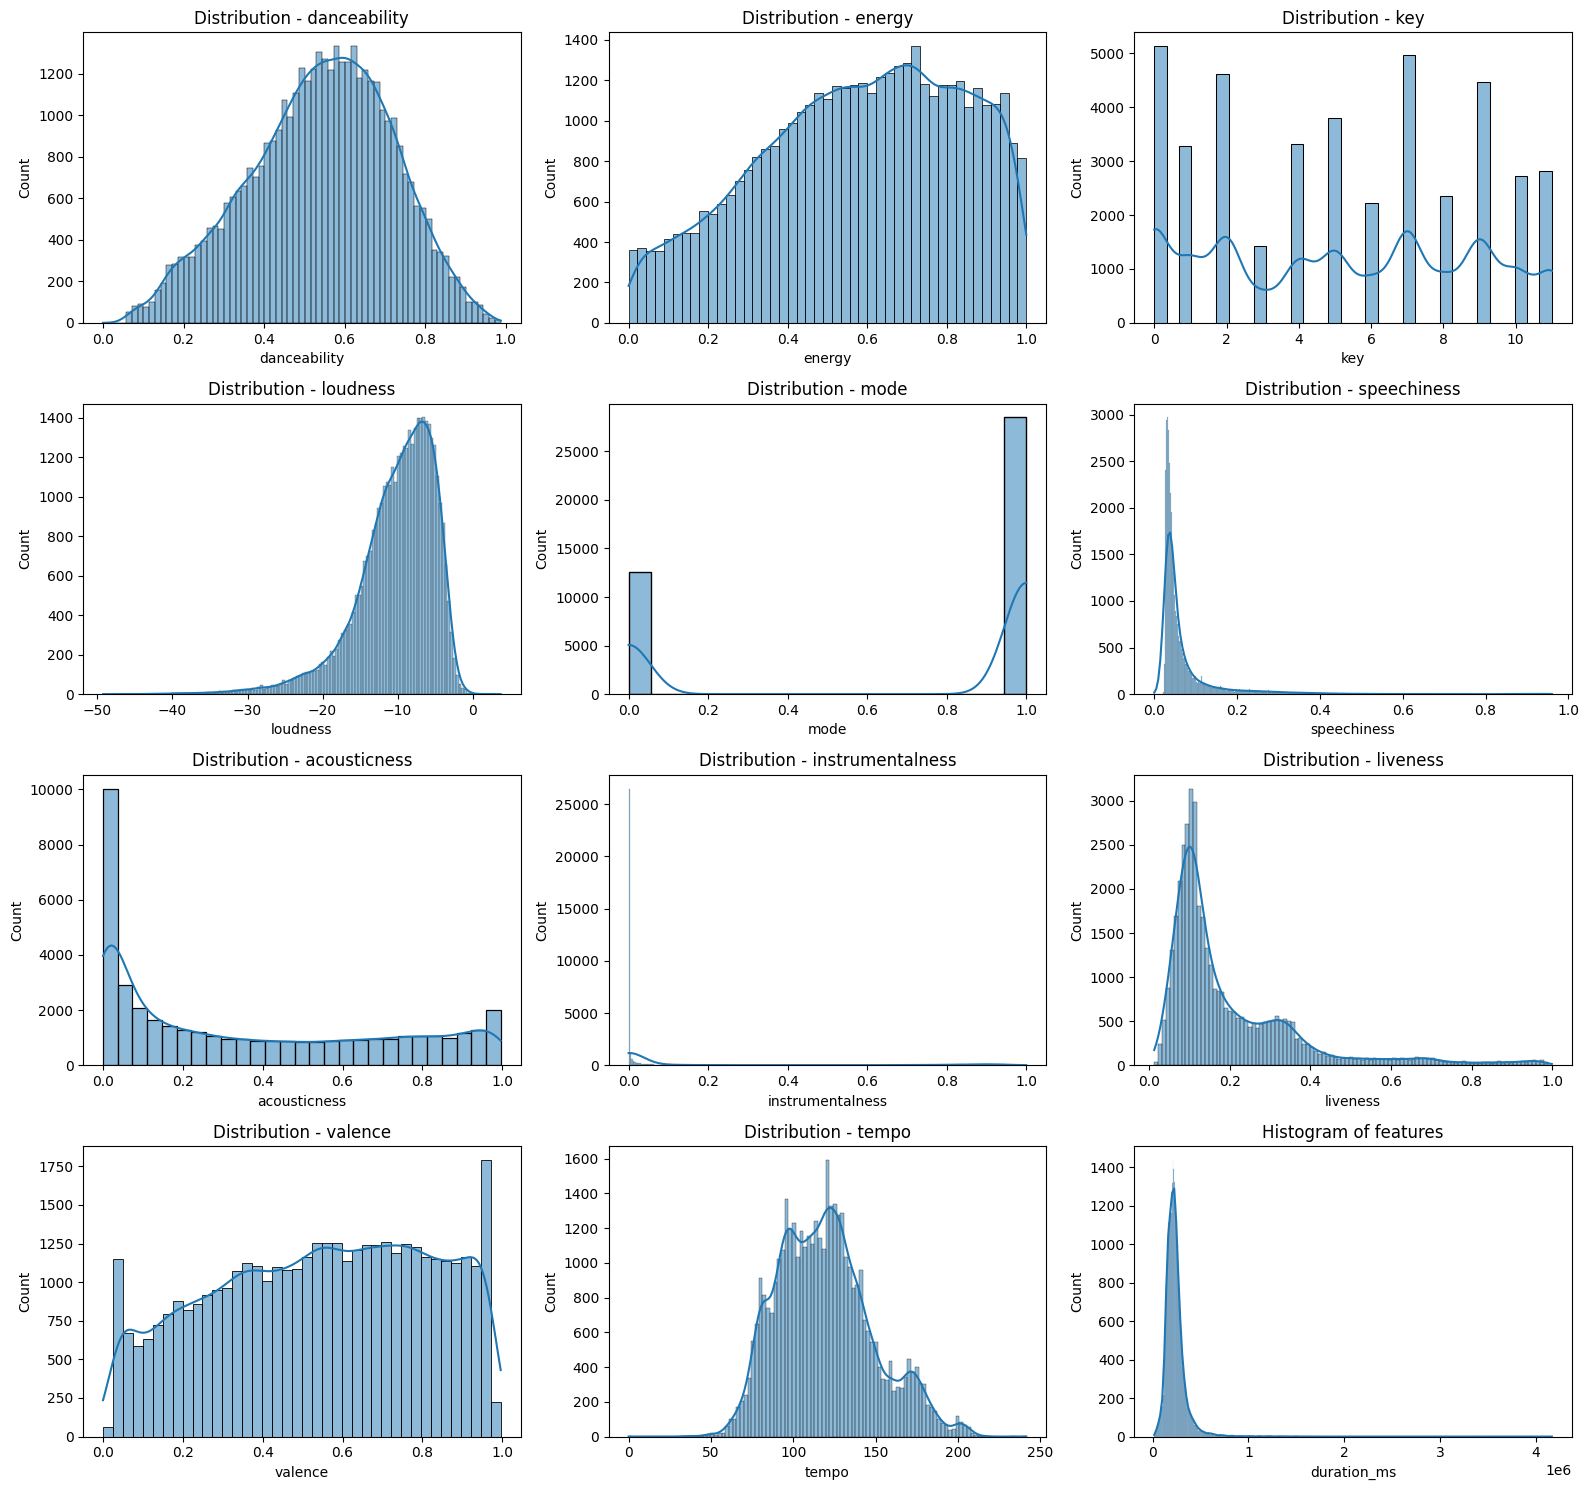

In [11]:
eda_columns = [['danceability', 'energy', 'key'],['loudness',
       'mode', 'speechiness'], ['acousticness', 'instrumentalness', 'liveness'],
       ['valence', 'tempo', 'duration_ms']]
fig, axs = plt.subplots(4, 3, figsize=(16, 15))

for row in range(4):
    for col in range(3):
        sns.histplot(main_df[eda_columns[row][col]], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Distribution - {eda_columns[row][col]}")
plt.title("Histogram of features")
plt.tight_layout()
plt.show()

Danceability: The distribution appears to be slightly skewed to the right, with most tracks having a danceability value between 0.4 and 0.8 also there are a few tracks with very high danceability values (>0.9).

Energy: The distribution is roughly normal, with most tracks having an energy value between 0.4 and 0.8 also there are a few tracks with very high and very low energy values.

Key: The distribution appears to be fairly uniform, suggesting no particular key is dominant in the dataset. However, there are some spikes at certain key values, indicating a slight preference for those keys.

Loudness: The distribution is skewed to the right, with most tracks having a loudness value between -20 and -5 dB. There are a few tracks that are significantly louder than the majority.

Speechiness: The distribution is skewed to the left, with most tracks having a speechiness value close to 0.0. There are a few tracks with significant speech content (>0.4).

Acousticness: The distribution is roughly normal, with most tracks having an acousticness value between 0.4 and 0.8. There are a few tracks at both ends of the spectrum, with some being very electronic and others being very acoustic.

Instrumentalness: The distribution is skewed to the right, with most tracks having some level of vocals (instrumentalness < 0.8). There are a few tracks that are completely instrumental.

Liveness: The distribution is skewed to the left, with most tracks having a liveness value between 0.1 and 0.4. There are a few tracks at both ends of the spectrum, with some sounding very much like studio recordings and others sounding more like live performances.

Valence: The distribution is normal, with most tracks having a positive valence value (>0.5).

Tempo: The distribution is normal, with most tracks having a tempo value of 80 to 130.

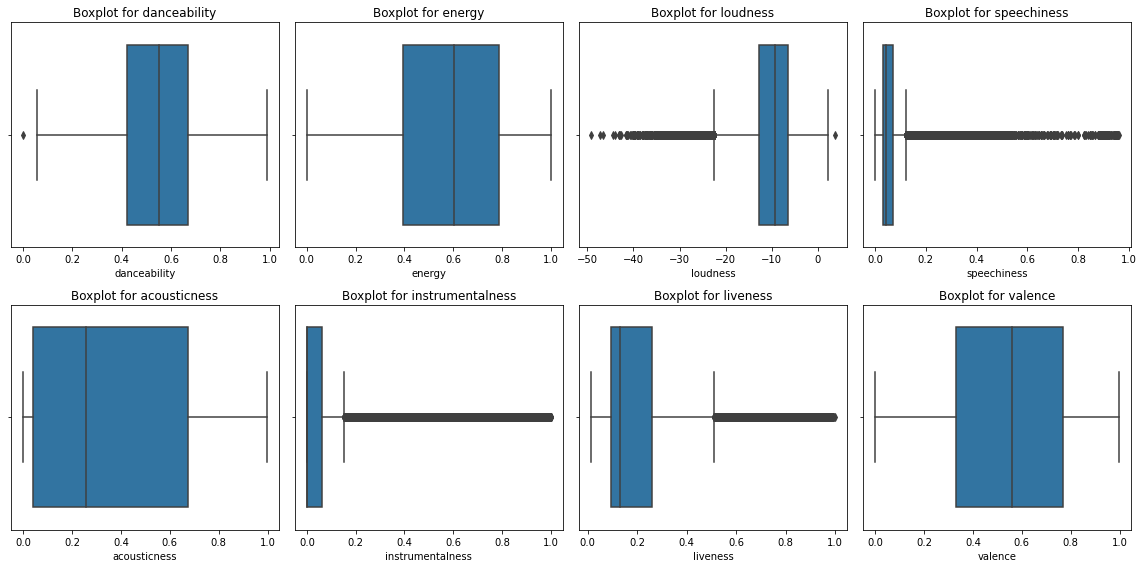

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

for i, col in enumerate(attributes):
    sns.boxplot(x=main_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")


plt.tight_layout()
plt.show()

Danceability, energy, and valence: Tend to be higher than average, suggesting a preference for music that is danceable, energetic, and positive.

Loudness: Generally quieter than industry standards, although there's a peak around -8.14 dB. Also, a lot of outliers in these column.

Acousticness: Mix of acoustic and electronic music, with a slight lean towards electronic but also a significant presence of fully acoustic tracks.

Speechiness and instrumentalness: Very low values, indicating mostly instrumental tracks with minimal spoken word content. Also there are a lot of outliers in these columns.

## Pair plot for song variables

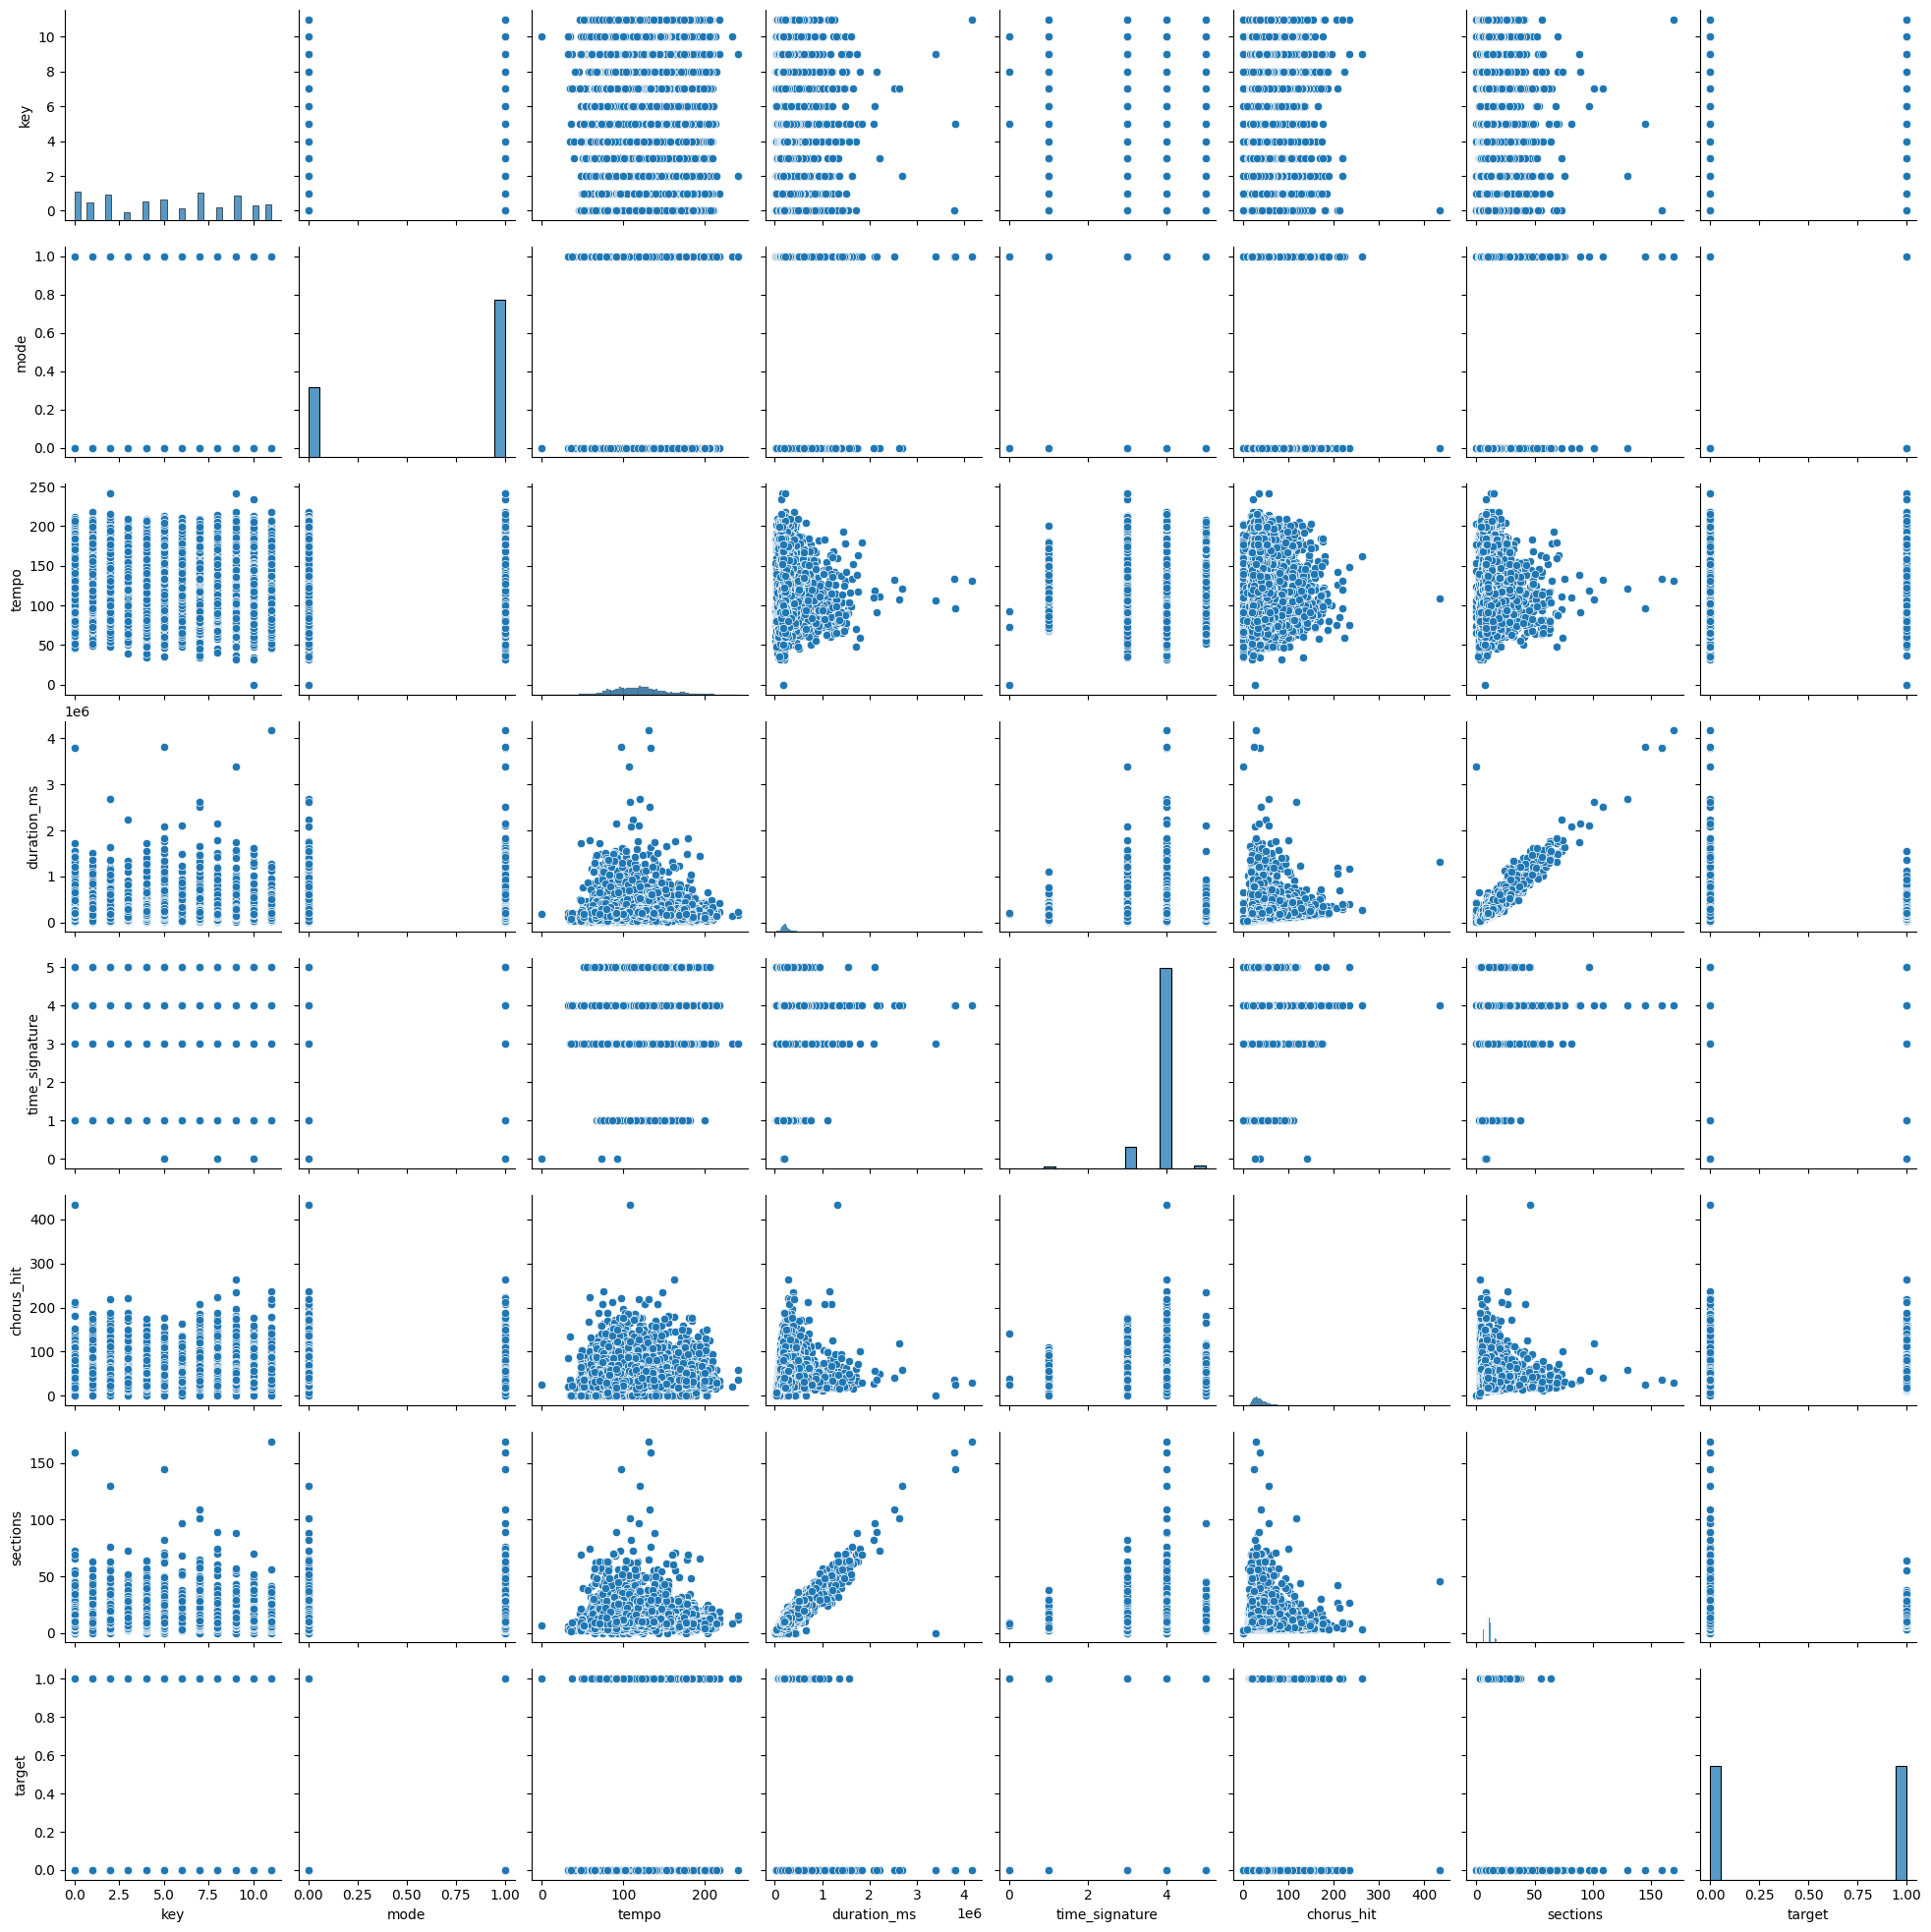

In [13]:
sns.pairplot(main_df[['track', 'artist', 'uri', 'key', 
       'mode','tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']])
plt.show()

We can observe a good positive relation between sections and duration_ms

## Pair plot for the meta variables 

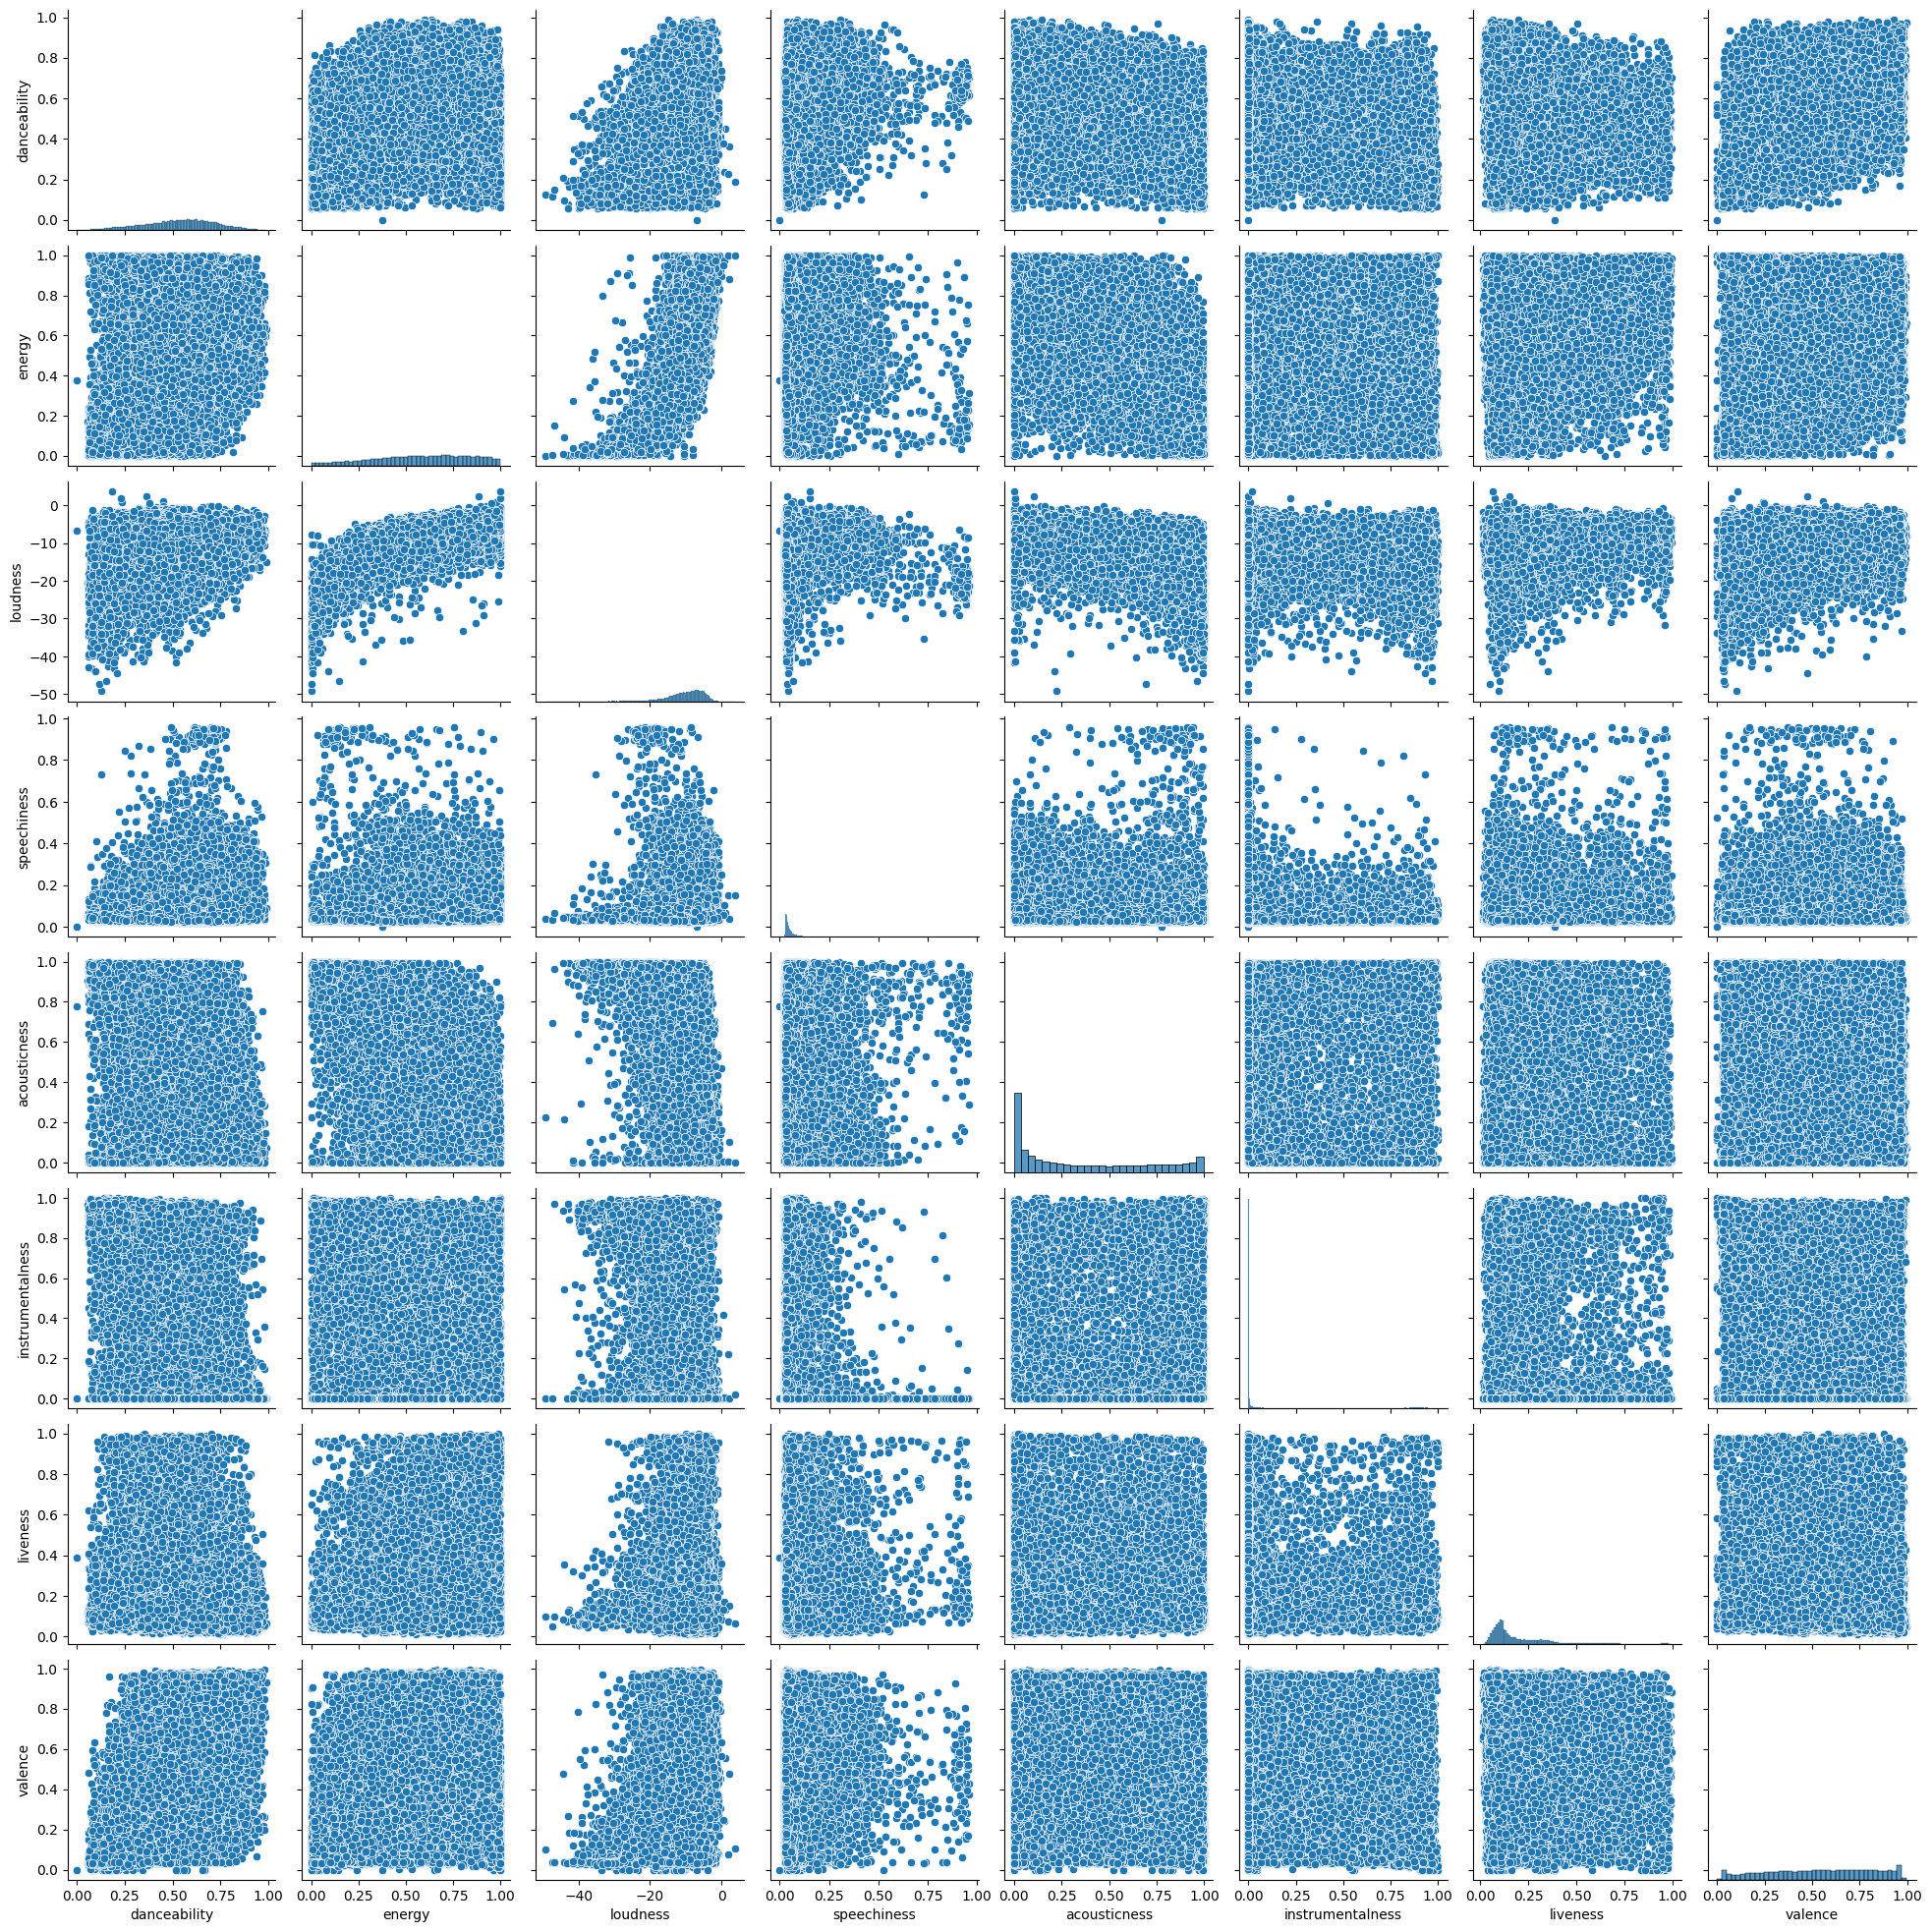

In [14]:
sns.pairplot(main_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']])
plt.show()

## Correlation

In [15]:
corr = main_df[[ 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']].corr(method='pearson')
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.206128  0.015433  0.274160 -0.032743   
energy                0.206128  1.000000  0.022523  0.772628 -0.033780   
key                   0.015433  0.022523  1.000000  0.008438 -0.140455   
loudness              0.274160  0.772628  0.008438  1.000000  0.000509   
mode                 -0.032743 -0.033780 -0.140455  0.000509  1.000000   
speechiness           0.156452  0.122430  0.026515  0.069241 -0.059636   
acousticness         -0.261252 -0.715088 -0.024178 -0.566548  0.049961   
instrumentalness     -0.301915 -0.208153 -0.013101 -0.374301 -0.075992   
liveness             -0.115251  0.157779  0.000668  0.086708  0.008886   
valence               0.553858  0.341427  0.007742  0.271775  0.035636   
tempo                -0.066541  0.224018  0.001154  0.169453  0.027053   
duration_ms          -0.063030  0.011830  0.015493 -0.049890 -0.074828   
time_signature        0.191664  0.196072  0.004757  0.165520 -0.009483   
chorus_hit           -0.036277  0.009620  0.010264 -0.013401 -0.022594   
sections             -0.058615 -0.040233  0.006784 -0.080065 -0.057095   
target                0.346097  0.177142  0.009883  0.286034  0.079614   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.156452     -0.261252         -0.301915 -0.115251   
energy               0.122430     -0.715088         -0.208153  0.157779   
key                  0.026515     -0.024178         -0.013101  0.000668   
loudness             0.069241     -0.566548         -0.374301  0.086708   
mode                -0.059636      0.049961         -0.075992  0.008886   
speechiness          1.000000     -0.083948         -0.084092  0.131488   
acousticness        -0.083948      1.000000          0.204137 -0.030765   
instrumentalness    -0.084092      0.204137          1.000000 -0.050582   
liveness             0.131488     -0.030765         -0.050582  1.000000   
valence              0.001528     -0.195331         -0.287047  0.000784   
tempo                0.036854     -0.179700         -0.053618  0.024861   
duration_ms          0.007631     -0.070271          0.106551  0.005336   
time_signature       0.021085     -0.188139         -0.077980  0.004773   
chorus_hit           0.012972     -0.012409          0.048654  0.037981   
sections            -0.008636     -0.016824          0.081188 -0.011742   
target              -0.040835     -0.246036         -0.407638 -0.051445   

                   valence     tempo  duration_ms  time_signature  chorus_hit  \
danceability      0.553858 -0.066541    -0.063030        0.191664   -0.036277   
energy            0.341427  0.224018     0.011830        0.196072    0.009620   
key               0.007742  0.001154     0.015493        0.004757    0.010264   
loudness          0.271775  0.169453    -0.049890        0.165520   -0.013401   
mode              0.035636  0.027053    -0.074828       -0.009483   -0.022594   
speechiness       0.001528  0.036854     0.007631        0.021085    0.012972   
acousticness     -0.195331 -0.179700    -0.070271       -0.188139   -0.012409   
instrumentalness -0.287047 -0.053618     0.106551       -0.077980    0.048654   
liveness          0.000784  0.024861     0.005336        0.004773    0.037981   
valence           1.000000  0.107901    -0.172166        0.155669   -0.059120   
tempo             0.107901  1.000000    -0.024318        0.007659   -0.056054   
duration_ms      -0.172166 -0.024318     1.000000        0.018454    0.093875   
time_signature    0.155669  0.007659     0.018454        1.000000   -0.011281   
chorus_hit       -0.059120 -0.056054     0.093875       -0.011281    1.000000   
sections         -0.133527  0.024905     0.888952        0.008424   -0.085920   
target            0.251147  0.032649    -0.073820        0.104884   -0.046409   

                  sections    target  
danceability     -0.058615  0.346097  
energy           -0.040233 

As we observed in the Pairplot above, section and duration_ms has a good positive correlation value of 0.88

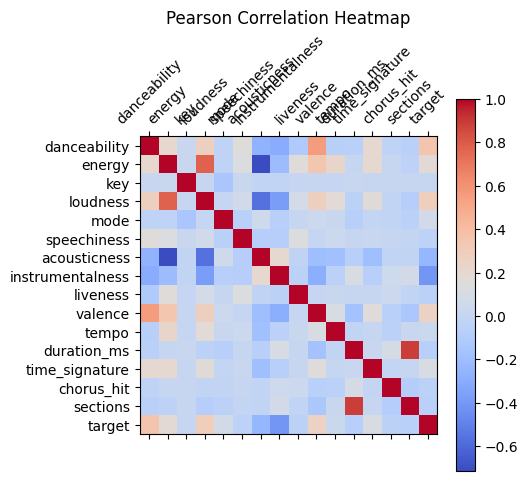

In [16]:
plt.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Pearson Correlation Heatmap")
plt.show()

The same correlation can be observed here.

## Reflection: 
We combined all the 6 csv files, it didn't contained any null values but some columns contained a lot of outliers. The summary statistics provide valuable insights into key attributes of the dataset. Danceability and energy exhibit symmetric distributions, with mean and median values close to each other, indicating a balanced spread of scores. Songs generally exhibit low speechiness, as reflected by a mean of 0.073 and a mode of 0.0331. Acousticness shows moderate prevalence, with a mean of 0.364 and a mode of 0.995 indicating high acoustic content. Valence leans towards positivity, with a mean of 0.542 and a mode of 0.961 indicating highly positive valence. The equal distribution of target classes around 0.5 suggests a balanced dataset with an equal number of hit and non-hit songs. The plots gave us a good insights on the dataset, histograms provided us with the distributions of the columns, boxplots compliment our finding from the statistical analysis, and from the pairplot, heatmap and correlation values we can infer that section and duration are the most correlated attributes.


## Difficulties: 
Interpreting correlation, while relationships between variables can be found through correlation analysis, it's important to keep in mind that correlation does not suggest connection. So, even if we get a high correlation value it doesn't mean there is some connection between them.
Plotting Pairplots, Plotting 19 features and analyzing them is bit confusing, thatswhy we plotted two pairplots wuth half-half features.

### Observations
- mode is 0 or 1
- key is 0 to 11